<a href="https://colab.research.google.com/github/bharatkj22/EE604-Image-Processing-IIT-Kanpur-/blob/main/Project101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# IMPORTING ALL THE NECESSARY LIBERARIES

In [3]:
!pip install matplotlib-venn

In [4]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [2]:
import numpy as np
import pandas as pd
import os
import librosa
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

from keras.utils import to_categorical
from sklearn import metrics
import random
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [12]:
!unzip /content/drive/MyDrive/ee603_related/validation.zip -d /content/drive/MyDrive  #UNZIP THE TRAIN DATASET

Archive:  /content/drive/MyDrive/ee603_related/validation.zip
   creating: /content/drive/MyDrive/dataset/
   creating: /content/drive/MyDrive/dataset/X/
  inflating: /content/drive/MyDrive/dataset/X/melspec_1127.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_1628.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2567.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2594.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_3826.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2640.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_1354.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2688.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_521.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2456.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_2644.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_611.npy  
  inflating: /content/drive/MyDrive/dataset/X/melspec_1381.npy  
  i

In [4]:
def eventroll_to_multihot_vector(eventroll):

    # findout active events:
    active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')

    # remove silence class:
    return np.delete(active_events, 8)

# PRE PROCESSING DATA



In [10]:
import os
i=0
f_input={}
for name in os.listdir("/content/drive/MyDrive/ee603_related/X"):
    s="/content/drive/MyDrive/ee603_related/X/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!="_"):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord("0"))
        j=j+1
    f_input[data]=t[0]
    i=i+1

In [11]:
print(len(f_input))

10000


In [5]:
i=0
f_output={}
arr1_y={}
for name in os.listdir("/content/drive/MyDrive/ee603_related/Y"):
    s="/content/drive/MyDrive/ee603_related/Y/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!='_'):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord('0'))
        j=j+1
    f_output[data]=eventroll_to_multihot_vector(t)
    i=i+1

In [6]:
print(len(f_output))

10000


In [12]:
final= []
for i in range(0, 10000):
  final.append([f_input[i],f_output[i]])  #appending input and output

In [13]:
dataframe = pd.DataFrame(final, columns=['feaures', 'class'])

In [14]:
dataframe.head()

,feaures,class
0,"[[0.1753835, 0.18565877, 0.18828404, 0.1854411...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
1,"[[0.1120325, 0.12441835, 0.13066268, 0.1346521...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
2,"[[0.19059084, 0.20715885, 0.21303593, 0.203357...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"[[0.2193706, 0.21709621, 0.20100619, 0.1762448...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ..."
4,"[[0.27521786, 0.29266554, 0.30288097, 0.301031...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [15]:
dataframe.iloc[2,0].shape

(64, 1000)

In [18]:
x=np.array(dataframe['feaures'][0:5000].to_list())
y=np.array(dataframe['class'][0:5000].to_list())

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train=x_train.reshape(4000,64,1000,1)
x_test=x_test.reshape(1000,64,1000,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [21]:
print(x_train.shape)

(4000, 64, 1000, 1)


In [22]:
import keras
import tensorflow as tf
from keras import regularizers, activations
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import layers

model = Sequential(
    [
        Conv2D(filters=16, kernel_size = (6,6), strides=(2,4), activation='relu', input_shape = x_train[0].shape),
        MaxPooling2D(pool_size = (2,2)),
        Conv2D(filters=32, kernel_size=(4,4),strides=(1,2), activation='relu'),
        MaxPooling2D(pool_size = (2,2)),
        Conv2D(filters=48, kernel_size=(5,5), activation='relu'),
        MaxPooling2D(pool_size = (2,2)),

        Flatten(),

        Dense(200,activation='relu'),
        Dropout(0.2),
        Dense(200,activation='relu'),
        Dropout(0.2),
        Dense(10,activation='sigmoid')
               ])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 249, 16)    │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 124, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 61, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 30, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 26, 48)      │        38,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 13, 48)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 624)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       125,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,474 (837.79 KB)

 Trainable params: 214,474 (837.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=[keras.metrics.BinaryAccuracy()])



In [24]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_test,y_test))

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - binary_accuracy: 0.8506 - loss: 0.4576 - val_binary_accuracy: 0.8709 - val_loss: 0.3791
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - binary_accuracy: 0.8701 - loss: 0.3718 - val_binary_accuracy: 0.8720 - val_loss: 0.3352
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8704 - loss: 0.3414 - val_binary_accuracy: 0.8710 - val_loss: 0.3320
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - binary_accuracy: 0.8709 - loss: 0.3392 - val_binary_accuracy: 0.8721 - val_loss: 0.3230
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.8709 - loss: 0.3301 - val_binary_accuracy: 0.8724 - val_loss: 0.3152
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - binary_accuracy: 0.8711 - loss: 0.3232 - val_binary_accuracy: 0.8749 - val_loss: 0.3132
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - binary_accuracy: 0.8736 - loss: 0.3175 - val_binary_accuracy: 0.8767 - val_loss

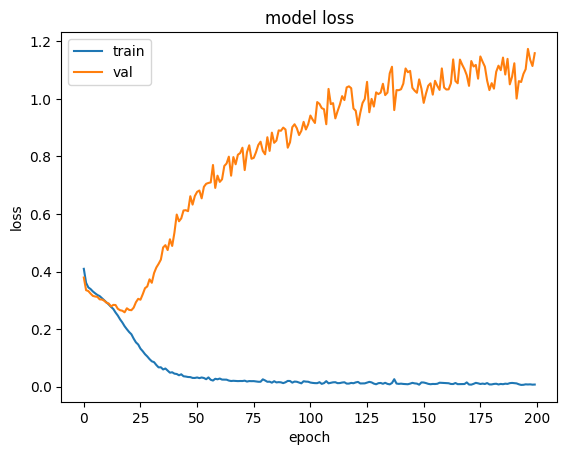

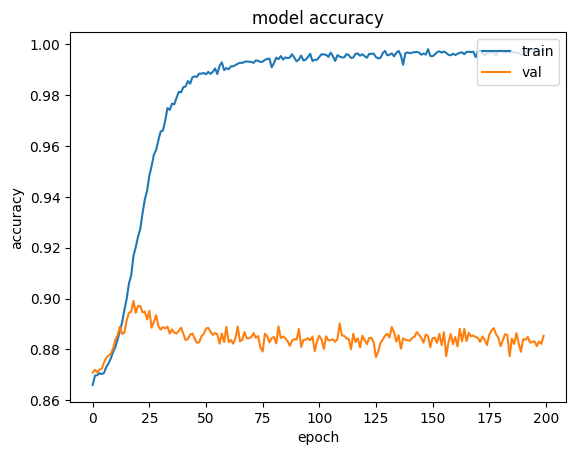

In [25]:
# Plotting the model
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [27]:
model.save("Bharat_A2.keras")  #SAVE THE MODEL SO THAT IF SYSTEM CRASHES, MODEL CAN BE RETRIEVED

In [40]:
import keras
model = keras.models.load_model("Bharat_A2.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#PREPROCESSING THE VALIDATION DATASET

In [28]:
import numpy as np
i=0
f_val_input={}
lst=[]
for name in os.listdir("/content/drive/MyDrive/ee603_related/dataset/X"):
    s="/content/drive/MyDrive/ee603_related/dataset/X/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!="_"):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord("0"))
        j=j+1
    f_val_input[data]=t[0]
    lst.append(data)
    i=i+1

In [29]:
print(len(f_val_input))

2000


In [30]:
i=0
f_val_output={}
arr1_y={}
for name in os.listdir("/content/drive/MyDrive/ee603_related/dataset/Y"):
    s="/content/drive/MyDrive/ee603_related/dataset/Y/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!='_'):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord('0'))
        j=j+1
    f_val_output[data]=eventroll_to_multihot_vector(t)
    i=i+1

In [31]:
print(len(f_val_output))

2000


In [32]:
final_val=[]
for i in lst:
    final_val.append(f_val_input[i])

In [33]:
y_val=[]
for i in lst:
    y_val.append(f_val_output[i])

In [34]:
final_val = np.array(final_val) #converting the list to array

In [35]:
y_prediction = model.predict(final_val) #PREDICTION OF VALIDATION DATASET

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [36]:
print(y_prediction.shape)

(2000, 10)


In [37]:
y_prediction = np.array(y_prediction)

In [38]:
y_prediction=y_prediction.round() #rounding off the decimal values to integers

In [39]:
from sklearn.metrics import precision_score
print(precision_score(y_prediction,y_val,average="samples"))    #calculating precision score

0.5261583333333333


#PREPROCESSING TEST DATA

In [41]:
!unzip /content/drive/MyDrive/ee603_related/test.zip -d /content/drive/MyDrive

Archive:  /content/drive/MyDrive/ee603_related/test.zip
   creating: /content/drive/MyDrive/test/
   creating: /content/drive/MyDrive/test/X/
  inflating: /content/drive/MyDrive/test/X/melspec_1014.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_996.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_2082.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_406.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_538.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_611.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_312.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_1167.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_421.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_1149.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_1626.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_1696.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_695.npy  
  inflating: /content/drive/MyDrive/test/X/melspec_1718.npy

In [42]:
i=0
f_test_input={}
filename=[]
lst=[]
for name in os.listdir("/content/drive/MyDrive/ee603_related/test/X"):
    s="/content/drive/MyDrive/ee603_related/test/X/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!="_"):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord("0"))
        j=j+1
    f_test_input[data]=t[0]
    lst.append(data)
    filename.append(name)
    i=i+1

In [43]:
print(len(f_test_input))

2500


In [44]:
print(len(lst))

2500


In [45]:
final_test=[]
for i in lst:
    final_test.append(f_test_input[i])

In [46]:
final_test = np.array(final_test)

In [47]:
y_test = model.predict(final_test)  #FINAL PREDICTION

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


In [48]:
y_test=y_test.round()  #ROUNDING OFF THE PROBABILITY TO INTEGER

#CONVERTING THE PREDICTED VALUES TO ACTUAL SOUND

In [49]:
PREDICTION=[]
annotate = ['Alarm_bell_ringing','Blender','Cat','Dishes','Dog','Electric_shaver_toothbrush','Frying','Running_water','Speech','Vacuum_cleaner']
for j in y_test:
    one = []
    for i in range(0,10):
        if j[i]==1:
            one.append(annotate[i])
    if(len(one)==0):
        one.append('silence')
    one = np.array(one)
    PREDICTION.append(one)

In [50]:
for sound in PREDICTION:   #FINAL PREDICTIONS
  print(sound)

['Blender' 'Speech']
['Blender' 'Speech']
['Dishes' 'Running_water' 'Speech']
['Alarm_bell_ringing' 'Speech']
['Blender' 'Dishes' 'Speech']
['Blender' 'Speech']
['Frying' 'Speech']
['Blender' 'Speech']
['Cat' 'Speech']
['Speech']
['Blender' 'Speech']
['Speech']
['Dishes' 'Frying' 'Speech']
['Speech']
['Dishes' 'Speech']
['Speech']
['Blender' 'Speech']
['Alarm_bell_ringing' 'Speech']
['Speech' 'Vacuum_cleaner']
['Blender' 'Speech']
['Speech']
['Running_water']
['Speech']
['Cat' 'Speech']
['Blender' 'Speech']
['Dog' 'Speech']
['Dishes' 'Speech']
['Cat' 'Speech']
['Alarm_bell_ringing' 'Speech']
['Blender' 'Speech']
['Frying' 'Speech']
['Frying' 'Speech']
['Speech' 'Vacuum_cleaner']
['Dishes' 'Frying' 'Running_water' 'Speech']
['Running_water' 'Speech']
['Speech']
['Dog' 'Speech']
['Dishes' 'Running_water' 'Speech']
['Frying' 'Speech']
['Speech' 'Vacuum_cleaner']
['Dog' 'Speech']
['Blender' 'Dishes']
['Speech' 'Vacuum_cleaner']
['Dishes' 'Speech']
['Cat' 'Speech']
['Dishes' 'Frying' 'Speec

#
CREATING CSV FILE

In [51]:
import pandas as pd
df = pd.DataFrame({"filename":filename,"preds":PREDICTION})
df.to_csv("Bharatkj_A_EE603.csv",index=False)

In [52]:
df.head()

,filename,preds
0,melspec_2349.npy,"[Blender, Speech]"
1,melspec_2348.npy,"[Blender, Speech]"
2,melspec_235.npy,"[Dishes, Running_water, Speech]"
3,melspec_2350.npy,"[Alarm_bell_ringing, Speech]"
4,melspec_2351.npy,"[Blender, Dishes, Speech]"


In [55]:
!unzip /content/drive/MyDrive/ee603_related/lables_test.zip -d /content/drive/MyDrive/ee603_related

Archive:  /content/drive/MyDrive/ee603_related/lables_test.zip
replace /content/drive/MyDrive/ee603_related/lables_test/eventroll_1893.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: label_test1
error:  cannot create /content/drive/MyDrive/ee603_related/label_test1
        Read-only file system
replace /content/drive/MyDrive/ee603_related/lables_test/eventroll_444.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/ee603_related/lables_test/eventroll_2196.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [56]:
i=0
f_test_output={}
filename=[]
lst1=[]
for name in os.listdir("/content/drive/MyDrive/ee603_related/lables_test"):
    s="/content/drive/MyDrive/ee603_related/lables_test/"+name
    t=np.load(s)
    size=len(name)
    data=0
    j=0
    while(name[j]!="_"):
        j=j+1
    j=j+1
    while(j<size-4):
        data=data*10+int(ord(name[j])-ord("0"))
        j=j+1
    f_test_output[data]=eventroll_to_multihot_vector(t)
    lst1.append(data)
    filename.append(name)
    i=i+1

In [57]:
print(f_test_output[0])

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


In [58]:
print(f_test_output)

{2349: array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]), 2348: array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.]), 2350: array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 235: array([1., 0., 0., 0., 1., 0., 0., 1., 1., 0.]), 2351: array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 2352: array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), 2354: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]), 2353: array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0.]), 2355: array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), 2357: array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]), 2356: array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]), 2359: array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), 2358: array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]), 236: array([1., 0., 0., 1., 1., 0., 0., 0., 1., 0.]), 2360: array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]), 2361: array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]), 2362: array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]), 2364: array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 2363: array

In [59]:
y_test_actual=[]
for i in lst:
    y_test_actual.append(f_test_output[i])

In [60]:
print((len(y_test_actual[8])))

10


In [61]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_test_actual,average="micro"))

0.6610839292435077


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test_actual, y_test))

              precision    recall  f1-score   support

           0       0.35      0.40      0.38       400
           1       0.35      0.43      0.38       266
           2       0.49      0.31      0.38       284
           3       0.46      0.31      0.37       689
           4       0.47      0.36      0.41       341
           5       0.52      0.23      0.32       283
           6       0.66      0.63      0.64       377
           7       0.33      0.26      0.29       306
           8       0.95      0.96      0.96      2373
           9       0.61      0.62      0.61       251

   micro avg       0.69      0.63      0.66      5570
   macro avg       0.52      0.45      0.47      5570
weighted avg       0.68      0.63      0.65      5570
 samples avg       0.71      0.64      0.66      5570



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
